In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import chi2_contingency


In [2]:
# Reading CSV files into dataframes
daily_activity_df = pd.read_csv("dailyActivity_merged (1).csv")
fitbit_df = pd.read_csv("FitBit data.csv")

#check DataFrames 
daily_activity_df.head()

  

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
fitbit_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [4]:
#Print the column names
print(daily_activity_df.columns)
print(fitbit_df .columns)   

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')


In [5]:
#merging the DataFrames
merged_df = pd.concat([daily_activity_df, fitbit_df], ignore_index=True)
merged_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
# Print the number of rows in the merged dataset
print("merged_df:", len(merged_df))

merged_df: 1397


In [7]:
# find the duplicate rows by  ID, activity date and total distance
duplicate_df = merged_df[merged_df.duplicated(subset=["Id", "ActivityDate", "TotalSteps"])]

# Remove duplicates from the original data based on specific columns
cleaned_data = merged_df.drop_duplicates(subset=['Id', 'ActivityDate', 'TotalSteps'])

# Calculate all active minutes and all active distance and add to df
cleaned_data['AllActiveMinutes'] = cleaned_data['LightlyActiveMinutes'] + cleaned_data['FairlyActiveMinutes'] + cleaned_data['VeryActiveMinutes']
cleaned_data['AllActiveDistance'] = cleaned_data['LightActiveDistance'] + cleaned_data['ModeratelyActiveDistance'] + cleaned_data['VeryActiveDistance']

#duplicate_df.to_csv("duplicates.csv", index=False)
#cleaned_data.to_csv("cleaned_data.csv", index=False)

In [31]:
# Define recommended guidelines
# rec dail activity in mins
rec_mins_pw = 90

# Rec daily steps
rec_daily_steps = 10000

In [9]:
# Ensure the activity_date column is in datetime format
cleaned_data["ActivityDate"] = pd.to_datetime(cleaned_data["ActivityDate"])

# Calculate the total number of activity dates for each ID
activity_counts = cleaned_data.groupby("Id")["ActivityDate"].nunique().reset_index()
activity_counts.columns = ["Id", "TotalActivityDates"]

# Calculate the total of all other columns for each ID
# Exclude the 'activity_date' column for the sum operation
columns_to_sum = cleaned_data.columns.difference(["ActivityDate"])

column_sums = cleaned_data[columns_to_sum].groupby("Id").sum().reset_index()

# Merge the two results
result = pd.merge(activity_counts, column_sums, on="Id")

# Rename columns to include the word 'Total' in each column header
result.columns = ['Total' + col if col != 'Id' else col for col in result.columns]

# Display the final result
print(result)

            Id  SumTotalActivityDates  SumAllActiveDistance  \
0   1503960366                     49            386.320001   
1   1624580081                     49            173.139999   
2   1644430081                     40            226.140001   
3   1844505072                     42             81.719999   
4   1927972279                     42             37.790000   
5   2022484408                     42            355.919999   
6   2026352035                     42            132.300000   
7   2320127002                     42            124.199999   
8   2347167796                     32            212.050000   
9   2873212765                     42            211.580001   
10  2891001357                      8              4.830000   
11  3372868164                     30            135.889999   
12  3977333714                     41            294.529999   
13  4020332650                     62            132.290000   
14  4057192912                     35             55.37

In [10]:
# Add new column for total active minutes
result["TotalActiveMinutes"] = result["SumFairlyActiveMinutes"] + result["SumLightlyActiveMinutes"] + result["SumVeryActiveMinutes"]

# Add new column for total active distance
result["TotalActiveDistance"] = result["SumLightActiveDistance"] + result["SumModeratelyActiveDistance"] + result["SumVeryActiveDistance"]

# Display the final result with new columns
print(result)


            Id  SumTotalActivityDates  SumAllActiveDistance  \
0   1503960366                     49            386.320001   
1   1624580081                     49            173.139999   
2   1644430081                     40            226.140001   
3   1844505072                     42             81.719999   
4   1927972279                     42             37.790000   
5   2022484408                     42            355.919999   
6   2026352035                     42            132.300000   
7   2320127002                     42            124.199999   
8   2347167796                     32            212.050000   
9   2873212765                     42            211.580001   
10  2891001357                      8              4.830000   
11  3372868164                     30            135.889999   
12  3977333714                     41            294.529999   
13  4020332650                     62            132.290000   
14  4057192912                     35             55.37

In [11]:
# Calculate the average of each column
averages = result.mean()
# Exclude the Id column
averages_excluding_id = averages.drop("Id")
# Format the values to 4 decimal places
averages_formatted = averages_excluding_id.round(4)
print(averages_formatted)

SumTotalActivityDates              39.2286
SumAllActiveDistance              204.7317
SumAllActiveMinutes              8719.4857
SumCalories                     90456.3714
SumFairlyActiveMinutes            534.9714
SumLightActiveDistance            127.4626
SumLightlyActiveMinutes          7399.0286
SumLoggedActivitiesDistance         5.2480
SumModeratelyActiveDistance        21.4923
SumSedentaryActiveDistance          0.0680
SumSedentaryMinutes             39616.6286
SumTotalDistance                  208.3300
SumTotalSteps                  290611.8571
SumTrackerDistance                207.2437
SumVeryActiveDistance              55.7769
SumVeryActiveMinutes              785.4857
TotalActiveMinutes               8719.4857
TotalActiveDistance               204.7317
dtype: float64


Here I want to see if each ID met the daily recommended activity time and total step counts

In [12]:
# Calculate average daily active minutes and daily steps
result['AverageDailyActiveMinutes'] = result['TotalActiveMinutes'] / result['SumTotalActivityDates']
result['AverageDailySteps'] = result['SumTotalSteps'] / result['SumTotalActivityDates']

# Determine if they met the recommended daily active minutes and step count
result['Met daily rec activity mins'] = result['AverageDailyActiveMinutes'] >= rec_mins_pw
result['Met daily rec step count'] = result['AverageDailySteps'] >= rec_daily_steps

# Convert boolean values to 'TRUE'/'FALSE'
result['Met daily rec activity mins'] = result['Met daily rec activity mins'].apply(lambda x: 'TRUE' if x else 'FALSE')
result['Met daily rec step count'] = result['Met daily rec step count'].apply(lambda x: 'TRUE' if x else 'FALSE')

# Count the number of 'TRUE' values in the specified columns
true_activity_mins_count = result['Met daily rec activity mins'].value_counts().get('TRUE', 0)
true_step_count = result['Met daily rec step count'].value_counts().get('TRUE', 0)

# Print the counts
print(f"Number of ID's meeting recommended daily active minutes: {true_activity_mins_count}")
print(f"Number of ID's meeting recommended daily step count: {true_step_count}")

# Display the final result
print(result)

# convert to csv
#result.to_csv("result.csv", index=False)

Number of ID's meeting recommended daily active minutes: 32
Number of ID's meeting recommended daily step count: 7
            Id  SumTotalActivityDates  SumAllActiveDistance  \
0   1503960366                     49            386.320001   
1   1624580081                     49            173.139999   
2   1644430081                     40            226.140001   
3   1844505072                     42             81.719999   
4   1927972279                     42             37.790000   
5   2022484408                     42            355.919999   
6   2026352035                     42            132.300000   
7   2320127002                     42            124.199999   
8   2347167796                     32            212.050000   
9   2873212765                     42            211.580001   
10  2891001357                      8              4.830000   
11  3372868164                     30            135.889999   
12  3977333714                     41            294.529999   
13 

1. Correlation between
   - LightlyActiveMinutes vs. LightActiveDistance
   - FairlyActiveMinutes vs. ModeratelyActiveDistance
   - VeryActiveMinutes vs. VeryActiveDistance
   - AllActiveMinutes vs. AllActiveDistance

Correlations between activity minutes and distances:
LightlyActiveMinutes vs. LightActiveDistance: 0.8762935452942788
FairlyActiveMinutes vs. ModeratelyActiveDistance: 0.6979928705143341
VeryActiveMinutes vs. VeryActiveDistance: 0.8348675153819457
AllActiveMinutes vs. AllActiveDistance: 0.7539476699627684


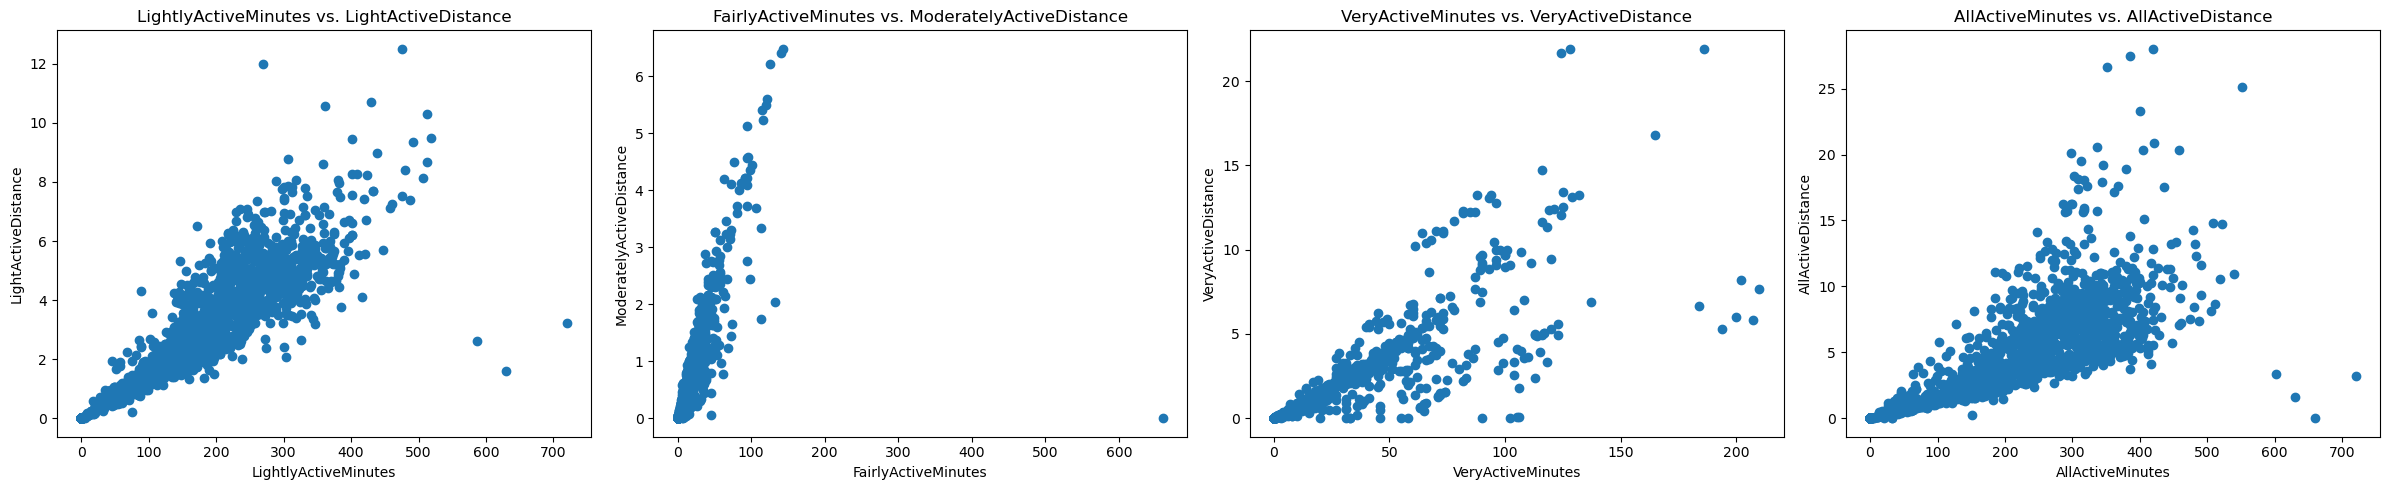

In [13]:
# Calculate the correlations between ActiviteMinutes vs ActiviteDistance
correlations = {
    'LightlyActiveMinutes vs. LightActiveDistance': cleaned_data[['LightlyActiveMinutes', 'LightActiveDistance']].corr().iloc[0, 1],
    'FairlyActiveMinutes vs. ModeratelyActiveDistance': cleaned_data[['FairlyActiveMinutes', 'ModeratelyActiveDistance']].corr().iloc[0, 1],
    'VeryActiveMinutes vs. VeryActiveDistance': cleaned_data[['VeryActiveMinutes', 'VeryActiveDistance']].corr().iloc[0, 1],
    'AllActiveMinutes vs. AllActiveDistance': cleaned_data[['AllActiveMinutes', 'AllActiveDistance']].corr().iloc[0, 1]
}

print("Correlations between activity minutes and distances:")
for key, value in correlations.items():
    print(f"{key}: {value}")

# Visualize the correlations
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# LightlyActiveMinutes vs. LightActiveDistance
axes[0].scatter(cleaned_data['LightlyActiveMinutes'], cleaned_data['LightActiveDistance'])
axes[0].set_title('LightlyActiveMinutes vs. LightActiveDistance')
axes[0].set_xlabel('LightlyActiveMinutes')
axes[0].set_ylabel('LightActiveDistance')

# FairlyActiveMinutes vs. ModeratelyActiveDistance
axes[1].scatter(cleaned_data['FairlyActiveMinutes'], cleaned_data['ModeratelyActiveDistance'])
axes[1].set_title('FairlyActiveMinutes vs. ModeratelyActiveDistance')
axes[1].set_xlabel('FairlyActiveMinutes')
axes[1].set_ylabel('ModeratelyActiveDistance')

# VeryActiveMinutes vs. VeryActiveDistance
axes[2].scatter(cleaned_data['VeryActiveMinutes'], cleaned_data['VeryActiveDistance'])
axes[2].set_title('VeryActiveMinutes vs. VeryActiveDistance')
axes[2].set_xlabel('VeryActiveMinutes')
axes[2].set_ylabel('VeryActiveDistance')

# AllActiveMinutes vs. AllActiveDistance
axes[3].scatter(cleaned_data['AllActiveMinutes'], cleaned_data['AllActiveDistance'])
axes[3].set_title('AllActiveMinutes vs. AllActiveDistance')
axes[3].set_xlabel('AllActiveMinutes')
axes[3].set_ylabel('AllActiveDistance')

plt.tight_layout()
plt.show()

Analysis

All the graphs show there is a atrong positive correaltion between active minutes and the corresponding distances for light and very active activities, and a moderate positive correlation for moderate activities. This indicates that as users spend more time being active, they cover more distance, showing consistent tracking by Fitbit.
The data indicates that users are engaging in various levels of activity, and Fitbit is accurately capturing these activities, which can motivate users to continue meeting or exceeding their exercise goals.
The strong correlations and consistent tracking suggest that having a Fitbit inspires users to be more active, as they can reliably track their activity minutes and distances. This aligns with the hypothesis that Fitbit users are motivated to meet the recommended exercise guidelines.
Overall, the analysis supports the idea that Fitbit is an effective tool for tracking and inspiring physical activity, helping users to meet their exercise goals by providing accurate and reliable data on their activity levels.

Users who spend more time in lightly active minutes tend to cover more distance. This suggests that light activities, like walking, are consistently tracked and directly proportional to the duration spent. Users who engage in very active minutes typically cover significant distances. This strong correlation suggests that very active activities are consistently tracked and that the duration spent on these activities is a good indicator of the distance covered.

However, the spread of users who spend more total active minutes (sum of light, fairly, and very active minutes) indicates that the relationship is not perfectly linear, possibly due to differences in individual activity patterns and intensities.

2. Comparison of averages on:
   - LightActiveDistance
   - ModeratelyActiveDistance
   - VeryActiveDistance
   - AllActiveDistance

Average VeryActiveDistance: 1.3974158904590537
Average ModeratelyActiveDistance: 0.5384609863274039
Average LightActiveDistance: 3.1934073011263533
Average AllActiveDistance: 5.129284177912811
Total days in dataset: 1397
Count of days with VeryActiveDistance > 0: 739 (52.90%)
Count of days with ModeratelyActiveDistance > 0: 783 (56.05%)
Count of days with LightActiveDistance > 0: 1238 (88.62%)
Count of days with AllActiveDistance > 0: 1239 (88.69%)
Average VeryActiveDistance (non-zero): 2.641664409974693
Average ModeratelyActiveDistance (non-zero): 0.9607024238817156
Average LightActiveDistance (non-zero): 3.6035460417395115
Average AllActiveDistance (non-zero): 5.783381756694268


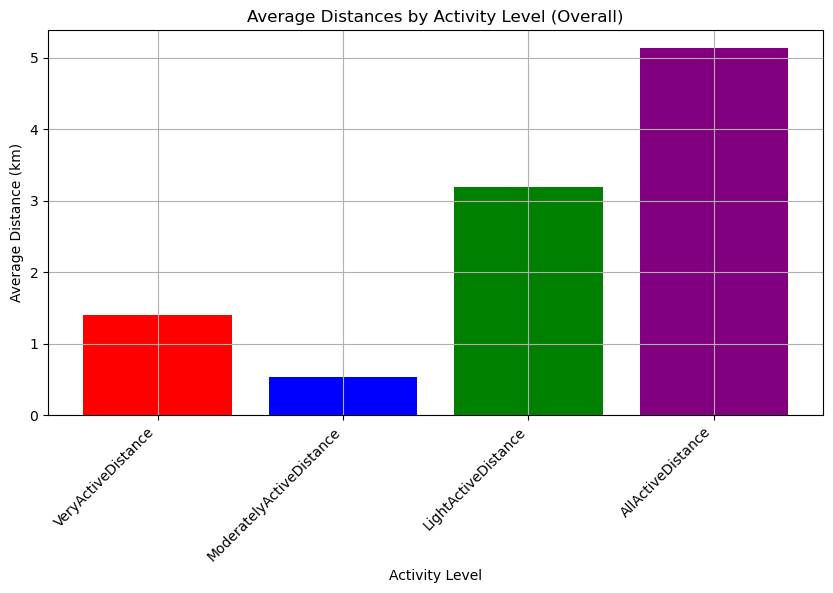

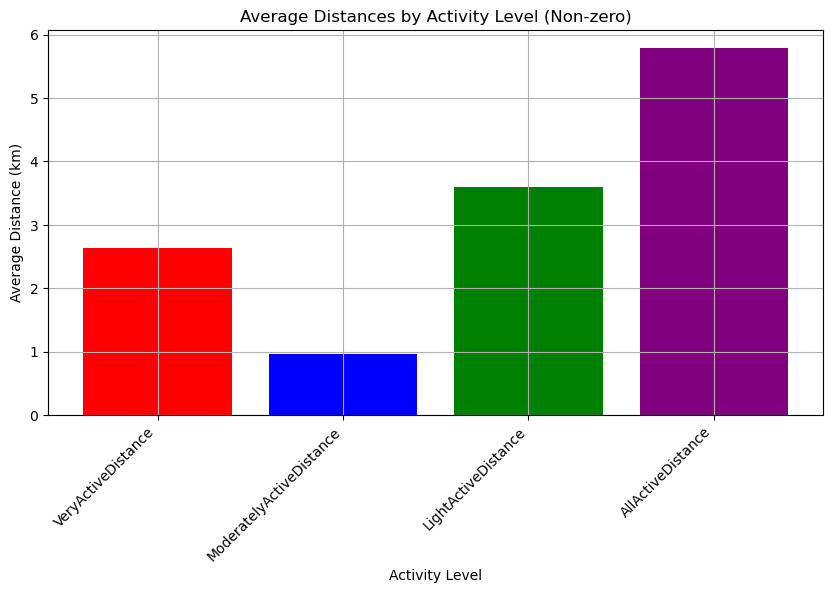

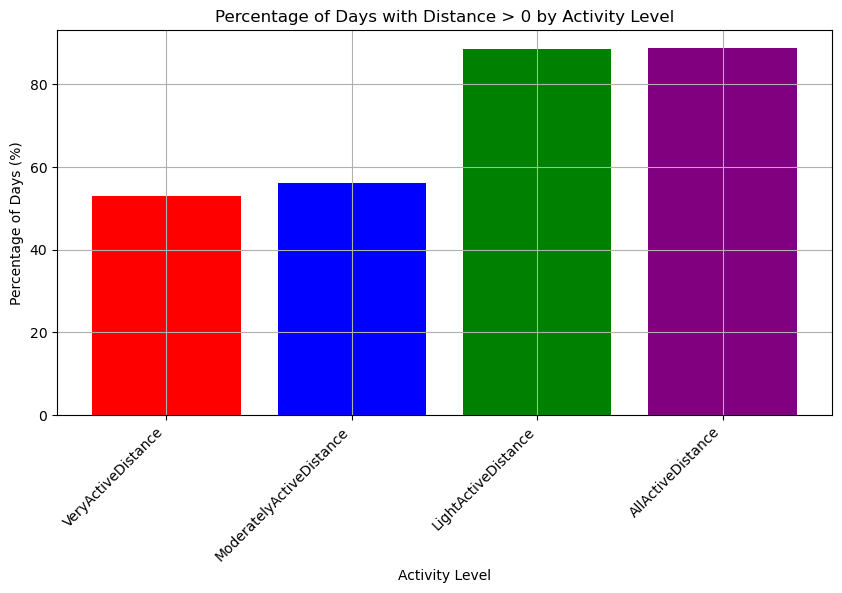

In [58]:
# Calculate the overall averages
avg_very_active = cleaned_data['VeryActiveDistance'].mean()
avg_moderately_active = cleaned_data['ModeratelyActiveDistance'].mean()
avg_light_active = cleaned_data['LightActiveDistance'].mean()
avg_all_active = cleaned_data['AllActiveDistance'].mean()

print(f"Average VeryActiveDistance: {avg_very_active}")
print(f"Average ModeratelyActiveDistance: {avg_moderately_active}")
print(f"Average LightActiveDistance: {avg_light_active}")
print(f"Average AllActiveDistance: {avg_all_active}")

# Get the count of days with a distance greater than 0
total_days = cleaned_data.shape[0]
count_very_active = (cleaned_data['VeryActiveDistance'] > 0).sum()
count_moderately_active = (cleaned_data['ModeratelyActiveDistance'] > 0).sum()
count_light_active = (cleaned_data['LightActiveDistance'] > 0).sum()
count_all_active = (cleaned_data['AllActiveDistance'] > 0).sum()

# Calculate the percentages
percent_very_active = (count_very_active / total_days) * 100
percent_moderately_active = (count_moderately_active / total_days) * 100
percent_light_active = (count_light_active / total_days) * 100
percent_all_active = (count_all_active / total_days) * 100

print(f"Total days in dataset: {total_days}")
print(f"Count of days with VeryActiveDistance > 0: {count_very_active} ({percent_very_active:.2f}%)")
print(f"Count of days with ModeratelyActiveDistance > 0: {count_moderately_active} ({percent_moderately_active:.2f}%)")
print(f"Count of days with LightActiveDistance > 0: {count_light_active} ({percent_light_active:.2f}%)")
print(f"Count of days with AllActiveDistance > 0: {count_all_active} ({percent_all_active:.2f}%)")

# Calculate the averages for days with distances greater than 0
avg_very_active_nonzero = cleaned_data.loc[cleaned_data['VeryActiveDistance'] > 0, 'VeryActiveDistance'].mean()
avg_moderately_active_nonzero = cleaned_data.loc[cleaned_data['ModeratelyActiveDistance'] > 0, 'ModeratelyActiveDistance'].mean()
avg_light_active_nonzero = cleaned_data.loc[cleaned_data['LightActiveDistance'] > 0, 'LightActiveDistance'].mean()
avg_all_active_nonzero = cleaned_data.loc[cleaned_data['AllActiveDistance'] > 0, 'AllActiveDistance'].mean()

print(f"Average VeryActiveDistance (non-zero): {avg_very_active_nonzero}")
print(f"Average ModeratelyActiveDistance (non-zero): {avg_moderately_active_nonzero}")
print(f"Average LightActiveDistance (non-zero): {avg_light_active_nonzero}")
print(f"Average AllActiveDistance (non-zero): {avg_all_active_nonzero}")

# Visualize the overall averages comparison
activity_distances = ['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'AllActiveDistance']
overall_averages = [avg_very_active, avg_moderately_active, avg_light_active, avg_all_active]

plt.figure(figsize=(10, 5))
plt.bar(activity_distances, overall_averages, color=['red', 'blue', 'green', 'purple'])
plt.title('Average Distances by Activity Level (Overall)')
plt.xlabel('Activity Level')
plt.ylabel('Average Distance (km)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Visualize the non-zero averages comparison
nonzero_averages = [avg_very_active_nonzero, avg_moderately_active_nonzero, avg_light_active_nonzero, avg_all_active_nonzero]

plt.figure(figsize=(10, 5))
plt.bar(activity_distances, nonzero_averages, color=['red', 'blue', 'green', 'purple'])
plt.title('Average Distances by Activity Level (Non-zero)')
plt.xlabel('Activity Level')
plt.ylabel('Average Distance (km)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Visualize the percentages of days with distances greater than 0
percentages = [percent_very_active, percent_moderately_active, percent_light_active, percent_all_active]

plt.figure(figsize=(10, 5))
plt.bar(activity_distances, percentages, color=['red', 'blue', 'green', 'purple'])
plt.title('Percentage of Days with Distance > 0 by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Percentage of Days (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


Analysis

Numbers and graphs shows that out of 1397 recorded days of data for the 35 participants there were 1239 recorded days where there was activity. This shows that about there were some days where no activity was done by participants. 

The overall averages show that users generally cover the most distance when engaging in light activities, followed by very active activities, and then moderately active activities.

When considering only the days where some distance was recorded, the average distances for all activity levels increase. This indicates that when users are active, they engage in substantial activity, especially for very active and light activities.

Overall Activity Patterns:

Light Active Distances: Users are most active in light activities, with the highest average distances and the highest percentage of days with recorded activity. This suggests that light activities, such as walking, are the most common form of exercise for users.
Very Active Distances: Users engage in very active activities less frequently but cover significant distances when they do. This indicates that intense activities might be less frequent but are substantial when performed.
Moderately Active Distances: Moderate activities are the least frequent and cover the shortest distances, suggesting that users either skip moderate activities or engage in them less intensely.

Engagement Levels:

The high percentage of days with light and all active distances suggests that users are generally consistent in their physical activity. However, the lower percentages for very active and moderate activities indicate that users might benefit from encouragement to engage more in these types of activities.

Non-zero Averages:

The increase in average distances for non-zero days across all activity levels highlights that users who engage in activities tend to do so with significant effort. This suggests that inactivity on certain days skews the overall averages, and users are quite active when they choose to exercise.


Recommendations
Encourage Higher Intensity Activities:

Given the lower frequency of very active and moderate activities, strategies to encourage users to increase the intensity of their workouts could be beneficial. This could include challenges, reminders, or rewards for engaging in higher intensity activities.
Monitor Inactive Days:

Understanding why users have inactive days and addressing those reasons could help improve overall activity levels. Personalized feedback or motivational messages on inactive days might help users stay more consistently active.
Promote Consistency:

Highlighting the benefits of regular physical activity and providing users with achievable daily goals can help maintain consistency, especially for very active and moderate activities.
By analyzing these metrics and providing targeted feedback, users can be better supported in achieving balanced and consistent physical activity, ultimately improving their overall health and fitness.

3. Distribution of TotalSteps against TotalActiveMinutes

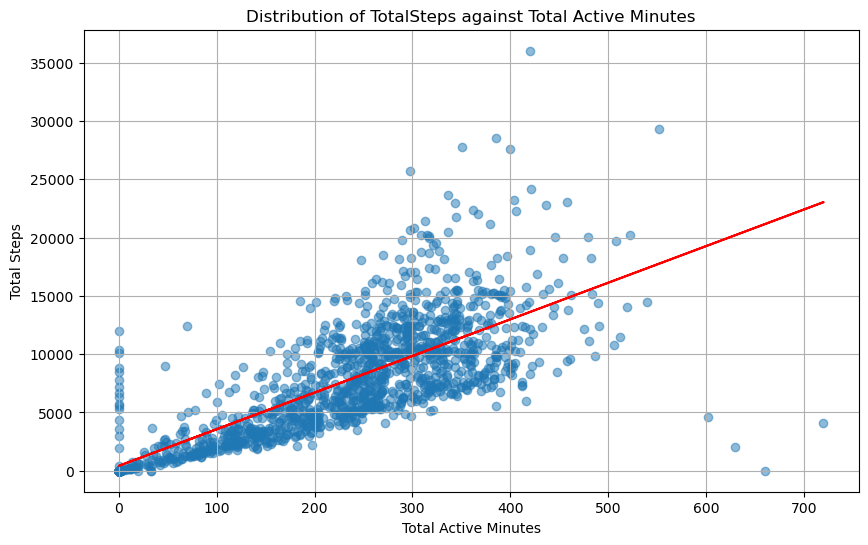

In [24]:
# Calculate total active minutes
cleaned_data['TotalActiveMinutes'] = cleaned_data['LightlyActiveMinutes'] + cleaned_data['FairlyActiveMinutes'] + cleaned_data['VeryActiveMinutes']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_data['TotalActiveMinutes'], cleaned_data['TotalSteps'])

# Plot the distribution of TotalSteps against TotalActiveMinutes
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['TotalActiveMinutes'], cleaned_data['TotalSteps'], alpha=0.5)
plt.title('Distribution of TotalSteps against Total Active Minutes')
plt.xlabel('Total Active Minutes')
plt.ylabel('Total Steps')
plt.grid(True)

# Plot the linear regression line
plt.plot(cleaned_data['TotalActiveMinutes'], intercept + slope * cleaned_data['TotalActiveMinutes'], color='red', label=f'Linear regression line (slope={slope:.2f}, intercept={intercept:.2f})')

plt.show()

Analysis

This scatter plot displays the relationship between TotalSteps and Total Active Minutes (sum of LightlyActiveMinutes, FairlyActiveMinutes, and VeryActiveMinutes).
Each point represents a day's data, plotting the total number of steps against the total active minutes for that day.
There is a positive correlation between TotalSteps and Total Active Minutes. As Total Active Minutes increase, the number of TotalSteps generally increases. 
There are some outliers with very high Total Active Minutes (300-700 minutes) and corresponding high TotalSteps.
Most data points are densely clustered between 0 and 300 Total Active Minutes and 0 and 15,000 Total Steps.
This clustering indicates that the majority of users tend to have between 0 to 300 active minutes per day and accumulate between 0 to 15,000 steps.
The distribution also shows some strange data where even though the total active minutes is 0, steps were recorded. This would indicate either falsely recorded data via user input or a malfunction in the Fitbit.
The variability in the data suggests that personalized recommendations could be beneficial. Users with the same amount of active minutes might achieve different step counts depending on their activity types and intensities.
Personalized coaching or feedback based on individual activity patterns could help users optimize their exercise routines for better results.

4. Percentage of total distance from TrackerDistance versus LoggedActivitiesDistance and Percentage of false tracked distances from TrackerDistance versus LoggedActivitiesDistance

Percentage of total distance from TrackerDistance: 99.48%
Percentage of total distance from LoggedActivitiesDistance: 2.52%


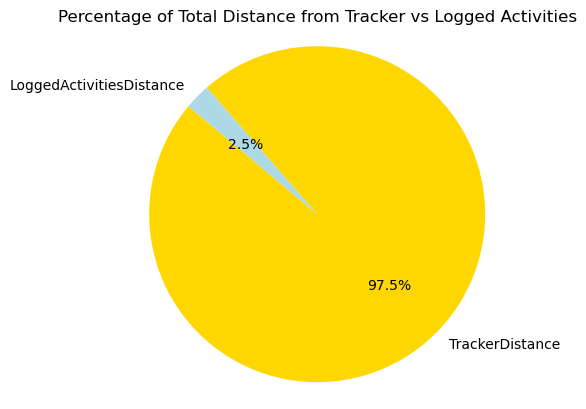

Total days in dataset: 1397
Number of false recordings (LoggedActivitiesDistance > TrackerDistance): 5
Percentage of false recordings: 0.36%


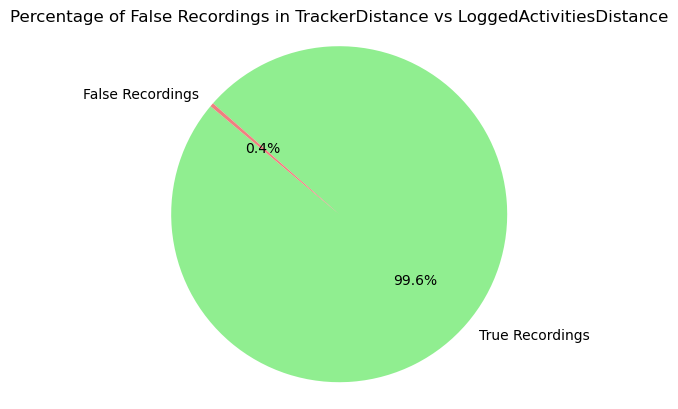

In [32]:
# Calculate total distance from both Tracker and LoggedActivities
total_tracker_distance = cleaned_data['TrackerDistance'].sum()
total_logged_activities_distance = cleaned_data['LoggedActivitiesDistance'].sum()
total_distance = cleaned_data['TotalDistance'].sum()

# Calculate the percentages
percentage_tracker = (total_tracker_distance / total_distance) * 100
percentage_logged_activities = (total_logged_activities_distance / total_distance) * 100

print(f"Percentage of total distance from TrackerDistance: {percentage_tracker:.2f}%")
print(f"Percentage of total distance from LoggedActivitiesDistance: {percentage_logged_activities:.2f}%")

# Visualize the percentages
labels = ['TrackerDistance', 'LoggedActivitiesDistance']
sizes = [percentage_tracker, percentage_logged_activities]
colors = ['gold', 'lightblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Distance from Tracker vs Logged Activities')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Identify false recordings
false_recordings = cleaned_data[cleaned_data['LoggedActivitiesDistance'] > cleaned_data['TrackerDistance']]

# Calculate the percentage of false recordings
total_days = cleaned_data.shape[0]
false_recordings_count = false_recordings.shape[0]
percentage_false_recordings = (false_recordings_count / total_days) * 100
percentage_true_recordings = 100 - percentage_false_recordings

print(f"Total days in dataset: {total_days}")
print(f"Number of false recordings (LoggedActivitiesDistance > TrackerDistance): {false_recordings_count}")
print(f"Percentage of false recordings: {percentage_false_recordings:.2f}%")

# Data for pie chart
labels = ['True Recordings', 'False Recordings']
sizes = [percentage_true_recordings, percentage_false_recordings]
colors = ['lightgreen', 'lightcoral']

# Plot the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of False Recordings in TrackerDistance vs LoggedActivitiesDistance')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Anaylsis

Description:Percentage of Total Distance from Tracker vs Logged Activities

The pie chart illustrates the proportion of total distance recorded by the Fitbit tracker (TrackerDistance) compared to the distance logged manually by users (LoggedActivitiesDistance).
TrackerDistance accounts for 97.5% of the total distance, while LoggedActivitiesDistance accounts for only 2.5%.

Description:Percentage of False Recordings in TrackerDistance vs LoggedActivitiesDistance

The pie chart shows the percentage of false recordings where LoggedActivitiesDistance exceeds TrackerDistance.
Out of 1397 total days, there are only 5 days (0.4%) with false recordings, while 99.6% of the recordings are accurate.

Reliability on Fitbit Tracking: The overwhelming majority of distance data comes from the Fitbit tracker, suggesting that users primarily rely on the device to track their activities.
User Engagement: The minimal percentage of LoggedActivitiesDistance indicates that users may not frequently log activities manually, which implies they trust the device's automatic tracking capabilities.
Accuracy and Trust: The extremely low percentage of false recordings (0.4%) indicates that Fitbit's automatic tracking is highly accurate and reliable.

This indicates that users likely trust and depend on Fitbit tracking to record their activities rather than manually logging them. User's trust the Fitbit to record their data but may not be utilising the Fitbit's full capability to possibly track goals and milestones during activity.


Hypothesis question

Is there a significant difference in the average active distances (Light, Moderate, and Very Active) between the first 7 days and the last 7 days of the survey?

Null Hypothesis: There is no significant difference in the average Active Distance between the first 7 days and the last 7 days.
Alternative Hypothesis: There is a significant difference in the average  Active Distance between the first 7 days and the last 7 days.

T-test for LightActiveDistance: t-statistic = 0.16990464574705405, p-value = 0.8660920770540905
T-test for ModerateActiveDistance: t-statistic = 0.1442947288458064, p-value = 0.886119662006992
T-test for VeryActiveDistance: t-statistic = 1.2539188878613425, p-value = 0.21842472130892082


<Figure size 1200x600 with 0 Axes>

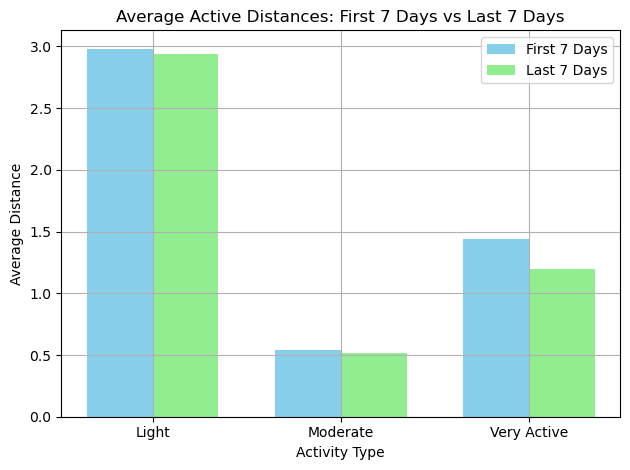

In [59]:
# Convert the date column to datetime format
cleaned_data['ActivityDate'] = pd.to_datetime(cleaned_data['ActivityDate'])

# Function to calculate the average distances for the first and last 7 days
def calculate_first_last_avg_distances(df):
    df = df.sort_values('ActivityDate')
    first_7_days = df.head(7)
    last_7_days = df.tail(7)
    return pd.Series({
        'First7_LightActiveDistance': first_7_days['LightActiveDistance'].mean(),
        'First7_ModerateActiveDistance': first_7_days['ModeratelyActiveDistance'].mean(),
        'First7_VeryActiveDistance': first_7_days['VeryActiveDistance'].mean(),
        'Last7_LightActiveDistance': last_7_days['LightActiveDistance'].mean(),
        'Last7_ModerateActiveDistance': last_7_days['ModeratelyActiveDistance'].mean(),
        'Last7_VeryActiveDistance': last_7_days['VeryActiveDistance'].mean()
    })

# Calculate the average distances for the first and last 7 days for each user
user_avg_distances = cleaned_data.groupby('Id').apply(calculate_first_last_avg_distances)

# Perform paired t-tests
t_test_results = {}
for activity in ['LightActiveDistance', 'ModerateActiveDistance', 'VeryActiveDistance']:
    t_stat, p_val = stats.ttest_rel(user_avg_distances[f'First7_{activity}'], user_avg_distances[f'Last7_{activity}'])
    t_test_results[activity] = (t_stat, p_val)

# Print t-test results
for activity, (t_stat, p_val) in t_test_results.items():
    print(f"T-test for {activity}: t-statistic = {t_stat}, p-value = {p_val}")

# Visualize the average distances for the first and last 7 days
average_distances = user_avg_distances.mean()

plt.figure(figsize=(12, 6))
x = np.arange(3)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [average_distances[f'First7_{activity}'] for activity in ['LightActiveDistance', 'ModerateActiveDistance', 'VeryActiveDistance']],
                width, label='First 7 Days', color='skyblue')
rects2 = ax.bar(x + width/2, [average_distances[f'Last7_{activity}'] for activity in ['LightActiveDistance', 'ModerateActiveDistance', 'VeryActiveDistance']],
                width, label='Last 7 Days', color='lightgreen')

ax.set_xlabel('Activity Type')
ax.set_ylabel('Average Distance')
ax.set_title('Average Active Distances: First 7 Days vs Last 7 Days')
ax.set_xticks(x)
ax.set_xticklabels(['Light', 'Moderate', 'Very Active'])
ax.legend()

fig.tight_layout()
plt.grid(True)
plt.show()

Interpretation
T-Test Results:

P-values for all activity types are greater than 0.05: This indicates that there is no statistically significant difference between the first 7 days and the last 7 days for light active distance, moderate active distance, and very active distance.
T-statistics are relatively low: This further supports the conclusion that there are no significant differences in the average active distances over time.
Visualization:

Light Active Distance:
The average light active distance slightly decreased from the first 7 days (approx. 2.8) to the last 7 days (approx. 2.7). However, the decrease is very small.
Moderate Active Distance:
The average moderate active distance remained nearly the same from the first 7 days to the last 7 days (approx. 0.5).
Very Active Distance:
The average very active distance slightly increased from the first 7 days (approx. 1.2) to the last 7 days (approx. 1.5). This increase, while noticeable in the bar plot, is not statistically significant according to the t-test results.
Conclusion
Based on the t-test results and the visualization:

No Significant Increase or Decrease:

There is no statistically significant increase or decrease in the average active distances (light, moderate, very active) from the first 7 days to the last 7 days of the dataset.
Consistency in Activity Levels:

The average distances for light and moderate activities remained relatively consistent over time, suggesting that users maintained their activity levels throughout the survey duration.
Slight Increase in Very Active Distance:

Although there was a slight increase in the average very active distance, this change was not statistically significant. This suggests that while some users might have increased their very active minutes, the overall trend did not show a significant improvement. Possibly with a larger time frame some significant differences and changes can be observed.